In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm

In [20]:
df_ab = pd.read_csv('ab_test_click_data.csv')

In [21]:
df_ab.head()

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [22]:
df_ab.describe()

,user_id,click
count,20000.000000,20000.000000
mean,10000.500000,0.405250
std,5773.647028,0.490953
min,1.000000,0.000000
25%,5000.750000,0.000000
50%,10000.500000,0.000000
75%,15000.250000,1.000000
max,20000.000000,1.000000


In [23]:
df_ab.groupby('group')['click'].value_counts()

group  click
con    0        8011
       1        1989
exp    1        6116
       0        3884
Name: count, dtype: int64

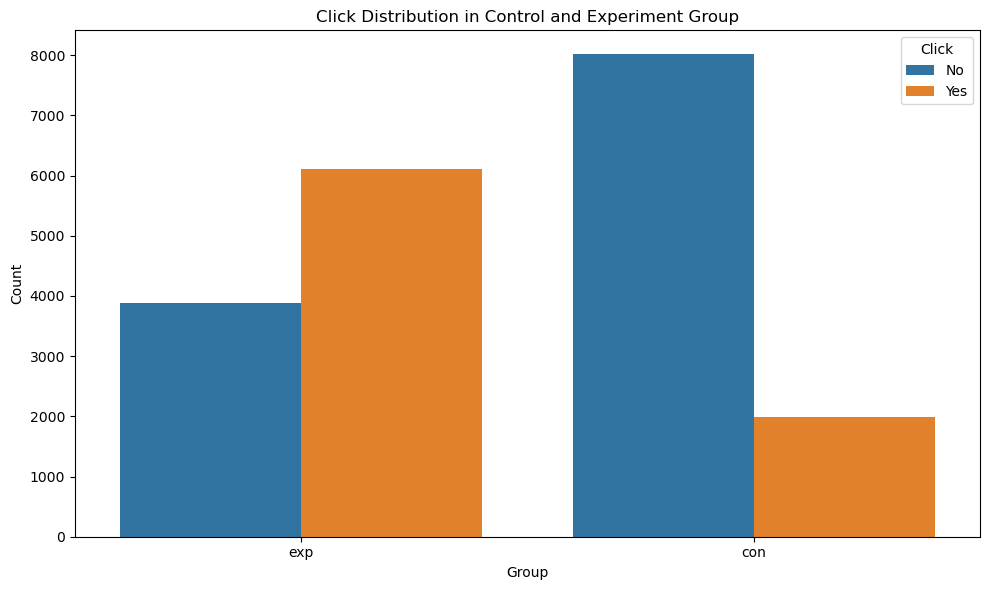

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='group', hue='click', data=df_ab)
plt.title('Click Distribution in Control and Experiment Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Click', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [25]:
alpha = 0.05
print('Alpha significance level is:', alpha)
delta = 0.1
print('Minimum effect size to detect is:', delta)

Alpha significance level is: 0.05
Minimum effect size to detect is: 0.1


## Calculating total number of clicks per group by summing clicks

In [26]:
# calculating total number of clicks per group by add all 1's
X_con = df_ab.groupby('group')['click'].sum().loc['con']
X_exp = df_ab.groupby('group')['click'].sum().loc['exp']
print('Total number of clicks: ', X_con + X_exp)
print('Total number of clicks in control group:', X_con)
print('Total number of clicks in experiment group:', X_exp)

Total number of clicks:  8105
Total number of clicks in control group: 1989
Total number of clicks in experiment group: 6116


In [27]:
N_con = df_ab['group'].value_counts().loc['con']
N_exp = df_ab['group'].value_counts().loc['exp']
print('Total number of samples in control group:', N_con)
print('Total number of samples in experiment group:', N_exp)

Total number of samples in control group: 10000
Total number of samples in experiment group: 10000


## Calculating Pooled Estimates for Clicks per Group

![image](pooled_prob.png)

In [28]:
# computing the estimated probability of a click for each group
p_con = X_con / N_con
p_exp = X_exp / N_exp
print('Estimated probability of a click in control group:', p_con)
print('Estimated probability of a click in experiment group:', p_exp)

# computing the estimate of pooled clicked probability
p_pool = (X_con + X_exp) / (N_con + N_exp)
print('Estimated pooled probability of a click:', p_pool)

Estimated probability of a click in control group: 0.1989
Estimated probability of a click in experiment group: 0.6116
Estimated pooled probability of a click: 0.40525


## Calculating Pooled Variance

In [29]:
# computing the estimate of pooled variance
pooled_var = p_pool * (1 - p_pool) * (1/N_con + 1/N_exp)
print('Estimated pooled variance:', pooled_var)

Estimated pooled variance: 4.82044875e-05


## Calculating Standard Error and Test Statistics

In [32]:
# computing the standard error
std_error = np.sqrt(pooled_var)
print('Standard error:', std_error)

# computing the z-score
z_score = (p_con - p_exp) / std_error
print('Z-score:', z_score)

# critical value of the Z-test
z_critical = norm.ppf(1 - alpha/2)
print('Critical value of the Z-test:', z_critical)

Standard error: 0.006942945160376826
Z-score: -59.44163326469381
Critical value of the Z-test: 1.959963984540054


## Calculating p_values of the Z-test
- A low p-value (p<=0.05 at 5% significance level) indicates strong evidence againts the null hypothesis, so we reject the null hypothesis
- A high p-value (p>0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis

In [34]:
# calculating p-value
p_value = 2 * norm.sf(abs(z_score))
print('P-value:', p_value)

# function to check the statistical significance
def check_statistical_significance(p_value, alpha):
    if p_value <= alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')

check_statistical_significance(p_value, alpha)

P-value: 0.0
Reject the null hypothesis


## Calculating Confidence Interval of the test

In [39]:
conf_int = [
    round((p_exp - p_con) - std_error*z_critical, 4),
    round((p_exp - p_con) + std_error*z_critical, 4)
]

print('Confidence interval:', conf_int)

Confidence interval: [0.3991, 0.4263]
